In [ ]:
import numpy as np
import scipy.stats as dist
import matplotlib.pyplot as plt

# generate data for reconstruction of the parameter theta
def bernoulli_stream(N, p):
    return (np.random.random(N) <= p)*1
N = 10; p = 0.7
X = bernoulli_stream(N, p)
print(X)

[1 1 1 0 0 1 1 1 1 0]


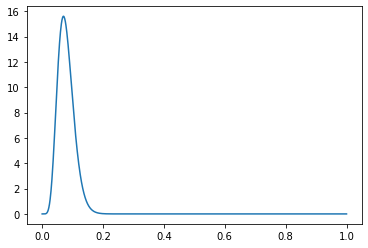

In [ ]:
# P(theta | X) = P(X | theta) * P(theta) / P(X)
# P(theta | X) = PRODUCT_i_to_N(P(x_i | theta)) * P(theta) / P(X)
# P(theta | X) = PRODUCT_i_to_N(Ber(x_i | theta)) * Beta(a, b) / P(X)
# P(theta | X) = PRODUCT_i_to_N(theta^I(x_i=1)*(1 - theta)^I(x_i=0)) * Beta(a, b) / P(X)
# P(theta | X) = theta^SUM_i_to_N(I(x_i=1))*(1 - theta)^SUM_i_to_N(I(x_i=0)) * Beta(a, b) / P(X)

# P(theta | X) = theta^n1 * (1 - theta)^n0 * theta^(a-1) * (1 - theta)^(b-1) / NORMALIZER
# P(theta | X) = theta^(n1+a-1) * (1 - theta)^(n0+b-1) / NORMALIZER
# P(theta | X) = Beta(n1+a, n0+b) 

n1 = np.sum(X)
n0 = N-n1
theta = np.linspace(0, 1, 1000)
# non-informative prior
a = 1
b = 1
posterior_theta_given_data = dist.beta( n1 + a, n0 + b)
plt.plot(theta, posterior_theta_given_data.pdf(theta))
plt.show()

N = 10 theta_mode = 0.599 | theta_var =  2.40199


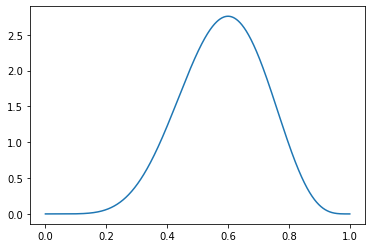

N = 100 theta_mode = 0.679 | theta_var =  0.21795899999999999


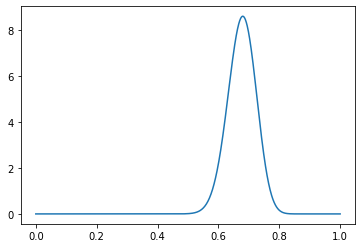

N = 1000 theta_mode = 0.696 | theta_var =  0.0211584


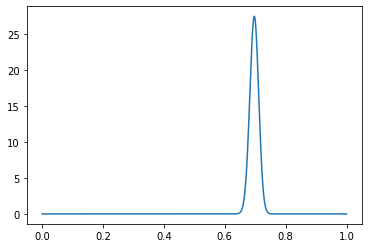

N = 10000 theta_mode = 0.695 | theta_var =  0.0021197500000000005


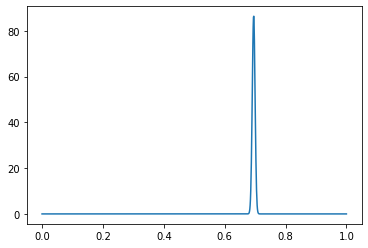

N = 100000 theta_mode = 0.702 | theta_var =  0.00020919599999999998


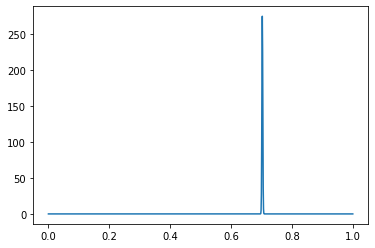

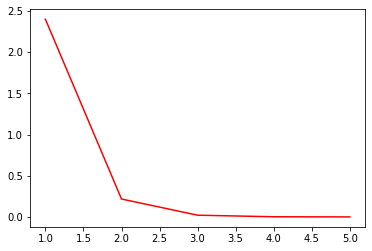

In [ ]:
theta_vars = []
Ns = [10, 100, 1000, 10000, 100000]
for N in Ns:
    X = bernoulli_stream(N, p)
    n1 = np.sum(X)
    n0 = N-n1
    prob = dist.beta.pdf(theta, a+n1, b+n0)
    theta_mode = prob.argmax() * 1/1000
    theta_var = 100*theta_mode * (1 - theta_mode)/N
    theta_vars.append(theta_var)
    print("N =", N, "theta_mode =", theta_mode, "| theta_var = ", theta_var)
    plt.plot(theta, prob)
    plt.show()
plt.plot([1, 2, 3, 4, 5], theta_vars, "-r")
plt.show()

Class Counts for 3 sided die =  [396 104 500]


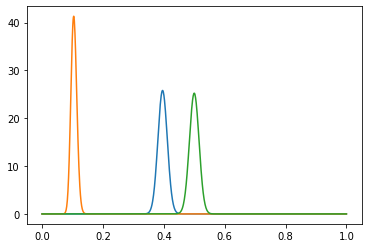

In [ ]:
# generate data for reconstruction
N = 1000
n_k = np.random.multinomial(N, [0.4, 0.1, 0.5]) 
print("Class Counts for 3 sided die = ", n_k)
# P(Theta | D) = P(D | Theta) * P(Theta) / P(D)
# P(Theta | D) = PRODUCT_k_to_K(P(x_k | theta_k)) * P(Theta) / P(D)
# P(Theta | D) = PRODUCT_k_to_K(Ber(x_k | theta_k)) * P(Theta) / P(D)
# P(Theta | D) = PRODUCT_k_to_K(theta_k^I(x=k)) * P(Theta) / P(D)
# P(Theta | D) = PRODUCT_i_to_N(theta_0^I(x_i=0)) * PRODUCT_i_to_N(theta_1^I(x_i=1)) * PRODUCT_i_to_N(theta_0^I(x_i=2)) * P(Theta) / P(D)
# P(Theta | D) = (theta_0^SUM_i_to_N(I(x_i=0)) * (theta_1^SUM_i_to_N(I(x_i=1)) * (theta_0^SUM_i_to_N(I(x_i=2))) * P(Theta) / P(D)
# P(Theta | D) = (theta_0^n0) * (theta_1^n1) * (theta_0^n2) * Dir(a, b, c) / P(D)  =  Mult(N, Theta) * Dir(a, b, c) / P(D)
# P(Theta | D) = (theta_0^n0) * (theta_1^n1) * (theta_0^n2) * Dir(a, b, c) / P(D)  =  Mult(N, Theta) * Dir(a, b, c) / P(D)

# P(Theta | D) = (theta_0^n0) * (theta_1^n1) * (theta_0^n2) * (theta_0^(a-1)) * (theta_1^(b-1)) * (theta_0^(c-1)) / NORMALIZER 
# P(Theta | D) = (theta_0^(n0+a-1)) * (theta_1^(n1+b-1)) * (theta_0^(n2+c-1)) / B(n01 + a, n1 + b, n2 + c) 
# P(Theta | D) = Dir(n01 + a, n1 + b, n2 + c)

# Dirichlet-Categorical Visualized as Beta-Binomial for each class
# uninformed prior
a = 1; b = 1
for n in n_k:
    prob_theta_given_data = dist.beta.pdf(theta, a + n, b + N - n)
    plt.plot(theta, prob_theta_given_data)
plt.show()

In [ ]:
prob_theta_given_data = dist.dirichlet(n_k+1)
prob_theta_given_data.pdf([1/3,1/3,1/3])

9.567077459087664e-63